In [80]:
from data_visualization import *
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from data_analysis import data_analysis
import seaborn as sns
import math
import pandas as pd

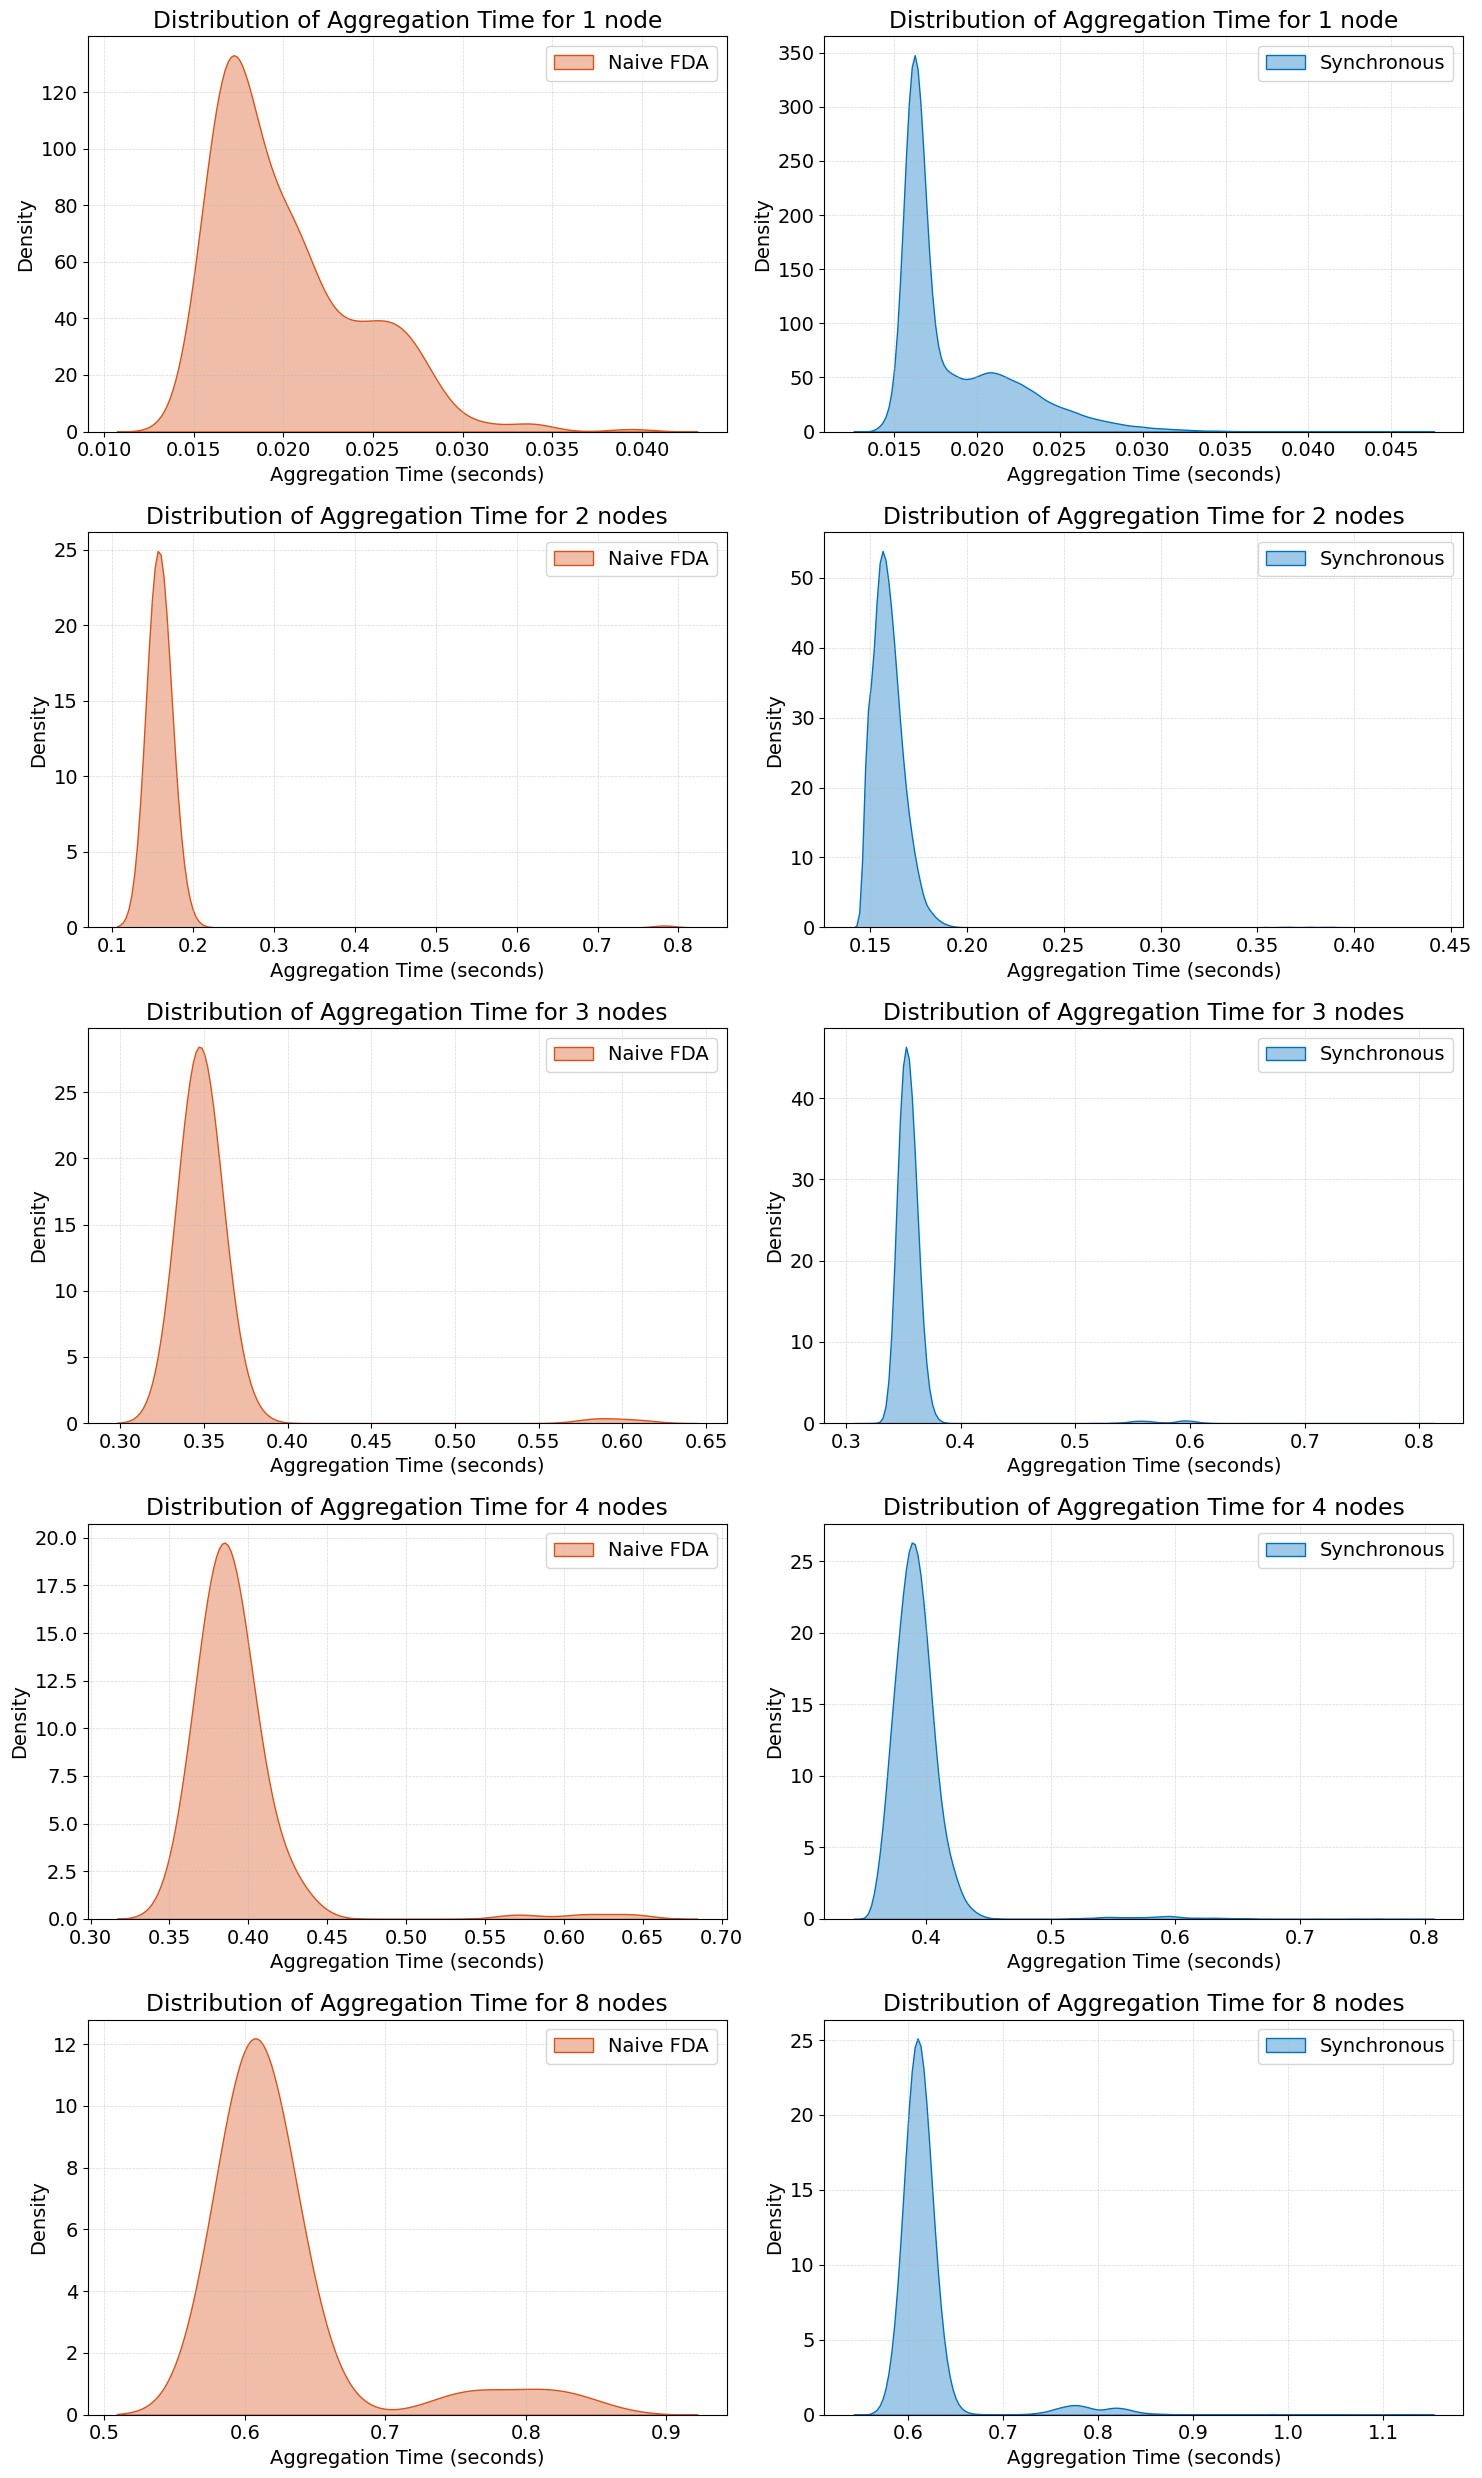

In [92]:
def drop_first_row(group):
    return group.iloc[1:]

da = data_analysis()

da.dfs[1]['diff_com_time'] = da.dfs[1]['com_time'].diff()
da.dfs[1]['diff_syncs'] = da.dfs[1]['syncs'].diff()

index_to_drop = da.dfs[1][da.dfs[1]['step'] == 1].index
da.dfs[1].drop(index_to_drop, inplace=True)
index_to_drop = da.dfs[1][da.dfs[1]['diff_syncs'] == 0].index
da.dfs[1].drop(index_to_drop, inplace=True)

da.group_repeated_expers(['clients','algorithm'])

result_df = da.grouped_list[1]['diff_com_time'].agg(['mean']).reset_index()

# Count the total number of groups
num_groups = len(da.grouped_list[1])

# Calculate the number of rows needed
num_rows = math.ceil(num_groups / 2)

# Create the subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))

# Flatten the axes array if there's only one row
if num_rows == 1:
    axes = axes.flatten()

for idx, (name, group) in enumerate(da.grouped_list[1]):
    algorithm = name[1]
    if name[1] == 'Synchronous SGD': algorithm = 'Synchronous'

    if algorithm == 'Synchronous': color = "#0072BD"
    elif algorithm == 'Naive FDA': color = "#D95319"
    # Identify the subplot to draw on
    ax = axes[idx // 2, idx % 2]
    nodes = str(int(int(name[0])/2))

    # Plot the histogram on this subplot
    sns.kdeplot(group['diff_com_time'], ax=ax, fill=True, label=algorithm, color=color, alpha=0.375)
    ax.grid(True, linestyle="--",linewidth=0.5,alpha=0.5)
    if nodes == '1': ax.set_title(f'Distribution of Aggregation Time for {nodes} node')
    else: ax.set_title(f'Distribution of Aggregation Time for {nodes} nodes')
    ax.set_xlabel('Aggregation Time (seconds)')
    ax.set_ylabel('Density')
    ax.legend()

# Remove any empty subplots
if num_groups % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])

plt.tight_layout()
plt.show()
